In [ ]:
#importing required libraries and performance metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing data file from file folder
s=pd.read_csv('/content/drive/My Drive/Micro credit/Data file.csv')

credit=pd.DataFrame(s)
credit.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
#getting description of each row
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [ ]:
credit.shape

(209593, 37)

In [ ]:
#here we have to remove some of the columns that are not adding any value to the prediction such as unnamed
#unnamed,msisdn are unique
#pcircle has only one value throughout the data and date is not needed when we have previous 30 days and 90 days data
credit.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [ ]:
#getting the overview from top 5 rows
credit.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [ ]:
#checking the data counts
credit['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

The ratio b/w label 1 and label 0 clearly shows that this is a imbalanced dataset

In [ ]:
#verifying for null value if any
credit.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

There is no null values here in the dataset

In [ ]:
#statistical summary of the dataset
credit.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


From the describe column,we see there is presence of outliers in each and every feature here,Lets apply z-score to reduce some

In [ ]:
#applying zscore
from scipy.stats import zscore
z=np.abs(zscore(credit))
credit_new=credit[(z<3).all(axis=1)]
credit_new.shape

(161465, 33)

We see after applying zscore,we get huge reduce in rows size and column too,so taking it as a primary dataset for processing

In [ ]:
credit=credit_new
credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


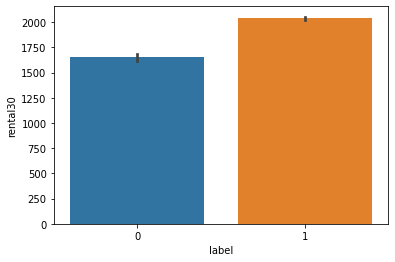

In [ ]:
sns.barplot('label','rental30',data=credit)

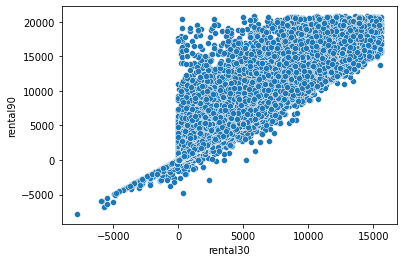

In [ ]:
sns.scatterplot('rental30','rental90',data=credit)

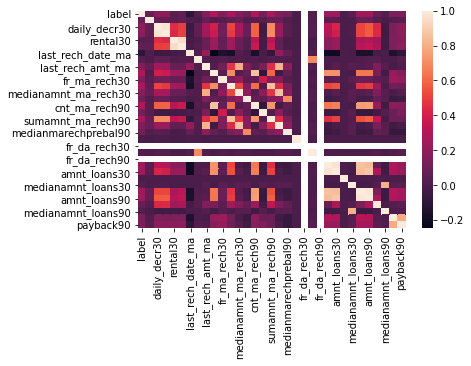

In [ ]:
sns.heatmap(credit.corr())

In [ ]:
#from the correlation heatmap,we see there is a high correlation in two columns over all the features,lets drop it
credit.drop(['fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

#### Splitting independent and dependent variable

In [ ]:
x=credit.iloc[:,1:]
y=credit.iloc[:,0]
print(x.shape)
print(y.shape)

(161465, 30)
(161465,)


In [ ]:
#splitting to train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,pred))
print('\n Accuracy Score : ', accuracy_score(y_test,pred))
print('\n Classification Report : \n \n', classification_report(y_test,pred))

Confustion Matrix : 

 [[  444  6863]
 [  343 45634]]

 Accuracy Score :  0.8647624052248329

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.56      0.06      0.11      7307
           1       0.87      0.99      0.93     45977

    accuracy                           0.86     53284
   macro avg       0.72      0.53      0.52     53284
weighted avg       0.83      0.86      0.81     53284



In [ ]:
#roc_curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

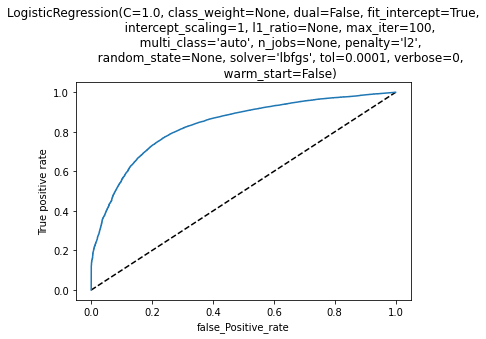

roc_auc_score= 0.5266516997141087


In [ ]:
roc(lr)

##### We see in the start there is the imbalanced dataset we have,so there is the possibility of bias in the result of accuracy and roc auc score is very low

Lets apply Random Forest without any hyperparameter tuning

In [ ]:
#applying random forest,it considered preferred for imbalanced dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,pred))
print('\n Accuracy Score : ', accuracy_score(y_test,pred))
print('\n Classification Report : \n \n', classification_report(y_test,pred))

Confustion Matrix : 

 [[ 3511  3796]
 [ 1089 44888]]

 Accuracy Score :  0.9083214473387884

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.76      0.48      0.59      7307
           1       0.92      0.98      0.95     45977

    accuracy                           0.91     53284
   macro avg       0.84      0.73      0.77     53284
weighted avg       0.90      0.91      0.90     53284



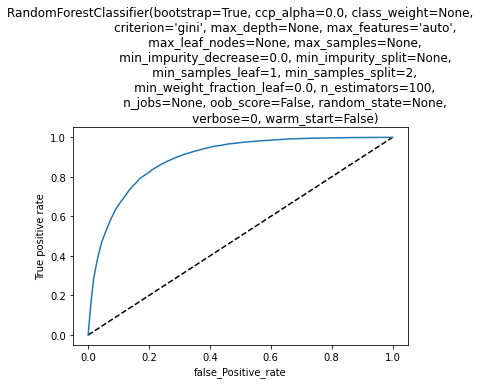

roc_auc_score= 0.7284061982675547


In [ ]:
roc(rf)

#### This seems to be a good technique but lets do some more operations

### Under sampling

In under sampling, reduced the dataset size (records) of higher class to balanced the ratio. It reduced the size to dataset So it is not a good apporach for small dataset

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 15093, 1: 93088})

In [ ]:
from imblearn.under_sampling import NearMiss

ns=NearMiss(0.8)

x_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)

print("The number of classes before fit {} ".format(Counter(y_train)))
print("The number of classes after fit {} ".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 93088, 0: 15093}) 
The number of classes after fit Counter({1: 18866, 0: 15093}) 


In [ ]:
ns_rf= RandomForestClassifier()

ns_rf.fit(x_train_ns, y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=ns_rf.predict(x_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[ 5848  1459]
 [33893 12084]]

 Accuracy Score :  0.3365362960738683

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.15      0.80      0.25      7307
           1       0.89      0.26      0.41     45977

    accuracy                           0.34     53284
   macro avg       0.52      0.53      0.33     53284
weighted avg       0.79      0.34      0.38     53284



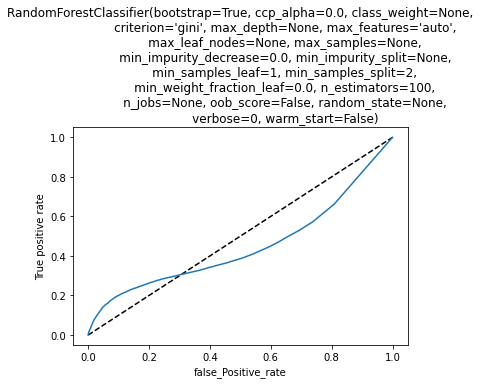

roc_auc_score= 0.5315777589379596


In [ ]:
roc(ns_rf)

#### Oversampling

This is surely not a good model for the given data


In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(0.75)

x_train_ns, y_train_ns = os.fit_sample(x_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 93088, 0: 15093})
The number of classes after fit Counter({1: 93088, 0: 69816})


In [ ]:
os_rf = RandomForestClassifier()

os_rf.fit(x_train_ns, y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = os_rf.predict(x_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[ 3953  3354]
 [ 1673 44304]]

 Accuracy Score :  0.9056564822460776

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.70      0.54      0.61      7307
           1       0.93      0.96      0.95     45977

    accuracy                           0.91     53284
   macro avg       0.82      0.75      0.78     53284
weighted avg       0.90      0.91      0.90     53284



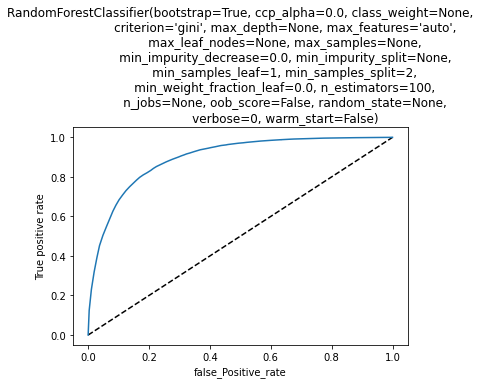

roc_auc_score= 0.7523001672559642


In [ ]:
roc(os_rf)

#### This is best technique to handle the given imbalanced data.

### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(0.75)

x_train_ns, y_train_ns = smt.fit_sample(x_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 93088, 0: 15093})
The number of classes after fit Counter({1: 91074, 0: 67802})


In [ ]:
smt_rf=RandomForestClassifier()
smt_rf.fit(x_train_ns, y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = smt_rf.predict(x_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[ 4197  3110]
 [ 2356 43621]]

 Accuracy Score :  0.8974176112904436

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.64      0.57      0.61      7307
           1       0.93      0.95      0.94     45977

    accuracy                           0.90     53284
   macro avg       0.79      0.76      0.77     53284
weighted avg       0.89      0.90      0.90     53284



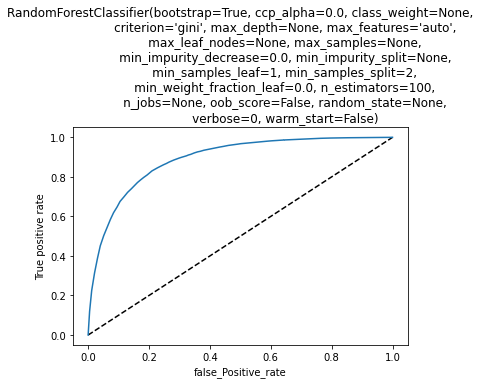

roc_auc_score= 0.7615688589976617


In [ ]:
roc(smt_rf)

### This is also a good technique for the given data

### Conclusion

#### Best Three techniques to handle this imbalanced dataset

1. Over Sampling with Random Forest
2. Random Forest with GridSearchCV
3. SMOTETomek